# Visualization of resampling techniques on imbalanced data

In this notebook, I show how different resampling techniques affect binary classification of imbalanced data. In particular, I study:

- Random oversampling the minority class
- Random undersampling the majority class
- Neighbour Cleaning Rule (NCL)
- Eliminating Tomek links
- SMOTE 



For the visualization, we use an imbalanced dataset composed of two classes of one-dimensional points, with labels -1 and +1. Let us imagine that the points with label -1 theoretically follow a normal function $\mathcal{N}(-3, 1)$. Let us imagine that the points with label +1 theoretically follow a normal function $\mathcal{N}(3, 1)$. It is obvious in this scenario that the "best" separating hyperplane is at $x = 0$. However, if, for example, the instances with label $-1$ are underrepresented, the hyperplane calculated by any learning algorithm would be slightly displaced to the left. The following cell allows for experimentation:

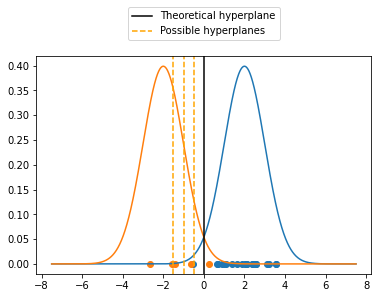

In [24]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-7.5, 7.5, 0.001)
# Mean = 2,-2, SD = 1.
xpos = normal(2, 1, size =20)
xneg = normal(-2, 1, size =5)
plt.scatter(xpos, np.zeros(20))
plt.scatter(xneg, np.zeros(5))
plt.plot(x_axis, norm.pdf(x_axis,2,1))
plt.plot(x_axis, norm.pdf(x_axis,-2,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=-1, label='Possible hyperplanes', c = "orange", linestyle = '--')
plt.axvline(x=-0.5, c = "orange", linestyle = '--')
plt.axvline(x=-1.5, c = "orange", linestyle = '--')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=1)
plt.show()

## Oversampling the minority class

Random oversampling consists on randomly replicating instances of the minority class. One of the benefits of this technique is that we do not discard any data and we increase the size our dataset. For small datasets this might be a effective technique. Furthermore, the new datapoints can be generated without any cost. 


However, this resampling effectively reduces the "variance" of the minority class as seen by any classification algorithm.  Essentially,
as the minority class is over-sampled, the algorithm learns to identify more specific regions in the feature space, which leads to a big generalization error.

In our toy example it is evident that a replication of the existing minority class data points could be interpreted as sampling from a normal function with smaller "variance". To make apparent what points I randomly replicated, I slightly displaced it in the $y$ direction. When we oversample this minority class,  the hyperplane will be displaced to the left with more certainty. We will get better and more consistent (if they involve randomness) results for our algorithms. However, this process could lead to overfitting and we could have a rather large generalization error. 


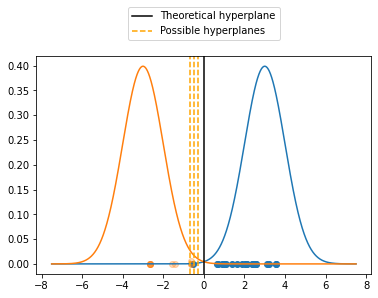

In [25]:
from random import sample, choices
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-7.5, 7.5, 0.001)
# Mean = 3,-3, SD = 1.

xnegOver = choices(xneg, k =10)

displaced = np.zeros(10)
mydict = {}
for i in range(len(xneg)):
  if xnegOver[i] in mydict.keys(): mydict[xnegOver[i]] += 0.005
  else:  mydict[xnegOver[i]] = 0.0
  displaced[i] = mydict[xnegOver[i]]

 

plt.scatter(xpos, np.zeros(20))
plt.scatter(xnegOver, displaced, alpha = 0.3)
plt.plot(x_axis, norm.pdf(x_axis,3,1))
plt.plot(x_axis, norm.pdf(x_axis,-3,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=-0.5,label='Possible hyperplanes', c = "orange", linestyle = '--')
plt.axvline(x=-0.7, c = "orange", linestyle = '--')
plt.axvline(x=-0.3, c = "orange", linestyle = '--')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=1)
plt.show()

## Undersampling the majority class

Random undersampling consists on discarding some instances of the majority class.

The disadvantages of this technique is that in principle we can discard key training examples. Opposite to the oversampling technique, we would be working with a smaller dataset, which could cause any algorithm to underfit. In our example, we can easily see that the algorithm could choose the right hyperplane at $x=0$ but there will be a big uncertainty due to high-variance result of undersampling (especially if the resultant size is small). 

Despite the reduction of training data size, undersampling has been reported to be better than oversampling [[1](https://www.researchgate.net/publication/245593532_C45_Class_Imbalance_and_Cost_Sensitivity_Why_Under-Sampling_beats_OverSampling)]. Also, similarly to the oversampling technique, random undersampling has no cost and the reduction in datasize could speed up the algorithm.

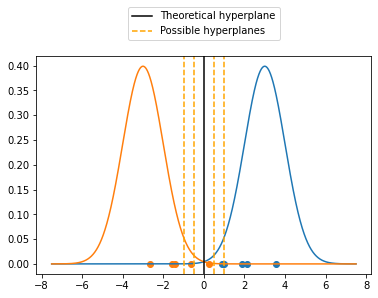

In [26]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-7.5, 7.5, 0.001)
# Mean = 2,-2, SD = 1.
xposUnder = sample(list(xpos), 5)

plt.scatter(xposUnder, np.zeros(5))
plt.scatter(xneg, np.zeros(5))
plt.plot(x_axis, norm.pdf(x_axis,3,1))
plt.plot(x_axis, norm.pdf(x_axis,-3,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=-1, label='Possible hyperplanes', c = "orange", linestyle = '--')
plt.axvline(x=-0.5, c = "orange", linestyle = '--')
plt.axvline(x=1, c = "orange", linestyle = '--')
plt.axvline(x=0.5, c = "orange", linestyle = '--')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=1)
plt.show()

## Neighbour Cleaning Rule

The technique we are going to explain now is more sophisticated than random oversampling and random undersampling. Together with the Tomek Links and SMOTE techniques we can include this technique in the category of "informed" sampling; i.e. it will take into account the geometry of the training dataset. This process will have an associated cost, which is a disadvantage with respect to the two previous techniques. 

The Neighbouring Cleaning Rule (NCL) [[2](https://link.springer.com/chapter/10.1007%2F3-540-48229-6_9)]  builds on a previous undersampling technique: Edited Nearest Neighbour rule (ENN)[[3](https://link.springer.com/article/10.1023/A:1007626913721)]. In binary classification, this rule consists of removing instances for which the majority class for the $k$ nearest neighbours is the opposite. This $k$ is normally taken as 3. This process eliminates boundary cases and thus making the data less noisy. In binary classification, the NCL rule builds on ENN as follows: 

- It applies ENN to the majority class:  data point belonging to the majority class are eliminated if most of their $k$ nearest neighbours belong to the minority class [[2](https://link.springer.com/chapter/10.1007%2F3-540-48229-6_9)]
- It applies "inverse" ENN for the minority class:  for all minority points, if most of their $k$ nearest neighbours belong to the majority class, then those neighbours belonging to the majority are eliminated

This process ensures that we do not undersample the minority class and undersample the majority class only "near" the boundary. One side effect is that the boundary pushed from the minority class toward the majority class. If the objective is to avoid the missclassification of the minority class, this approach will be benefitial. However, it may lead to the misclassification of some majority class points. The usefulness of this sampling approach depends highly on the application.




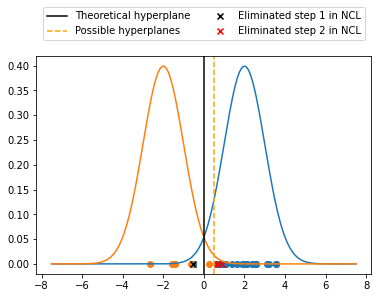

In [34]:
xpos2rule = [x for x in xpos if x >0 and x <1]
xpos1rule = [x for x in xpos if x <0]
xpostot = [x for x in xpos if x>0.3]


plt.scatter(xpos, np.zeros(len(xpos)))
plt.scatter(xneg, np.zeros(5))
plt.scatter(xpos1rule, np.zeros(len(xpos1rule)), marker = "x", c = "black", label = "Eliminated step 1 in NCL")
plt.scatter(xpos2rule, np.zeros(len(xpos2rule)), marker = "x", c = "red", label = "Eliminated step 2 in NCL")


plt.plot(x_axis, norm.pdf(x_axis,2,1))
plt.plot(x_axis, norm.pdf(x_axis,-2,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=0.5, label='Possible hyperplanes', c = "orange", linestyle = '--')



plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.show()

## Tomek Links
Tomek link sampling is similar to the Neighbouring Cleaning rule in the sense that it takes into account the geometry of the dataset. However, it is less aggressive in the cleaning, which can lead to a bigger dataset than with the use of Neighbouring Cleaning rule. 

In particular, this sampling only affectes Tomek links. These are pair of points belonging to different to each class such that they are each other's closest neighbour. In other words, for a Tomek link $(x,y)$ there is no other point $z$ such that its distance obeys $d(x, z) < d(x, y)$ or $d(z, y) < d(x, y)$. The sampling is done as follows: all Tomek links are identified, and the majority class point in these pairs are removed. 

The result in our toy dataset is similar as the NCL, but the quantity of points removed is smaller. This may provide with a final bigger set. This process will also succeed to avoid the misclassification of minority class points, although one could expect in a lesser degree than NCL. One disadvantage of this process shared with the NCL is that calculating Tomek links is more costly than random oversampling or undersampling. 


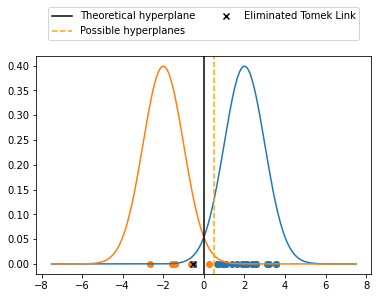

In [35]:
xpos2rule = [x for x in xpos if x >0 and x <0.3]
xpos1rule = [x for x in xpos if x <0]
xpostot = [x for x in xpos if x>0.3]



plt.scatter(xpos, np.zeros(len(xpos)))
plt.scatter(xneg, np.zeros(5))
plt.scatter(xpos1rule, np.zeros(len(xpos1rule)), marker = "x", c = "black", label = "Eliminated Tomek Link")
plt.scatter(xpos2rule, np.zeros(len(xpos2rule)), marker = "x", c = "black")


plt.plot(x_axis, norm.pdf(x_axis,2,1))
plt.plot(x_axis, norm.pdf(x_axis,-2,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=0.5, label='Possible hyperplanes', c = "orange", linestyle = '--')



plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.show()

# SMOTE

The last technique in this project is SMOTE (Synthetic Minority Over-sampling TEchnique). This approach combines the ideas oversampling and using the geometry of the dataset. The novelty part (and success) is in its synthetic nature. The previous detailed undersampling techniques had the problem that reduced the size of the dataset, which may cause underfitting. On the other hand, the random oversampling technique could lead to overfitting. The researchers that proposed SMOTE filled the gap with SMOTE: generate extra minority class points that maintain the generalization low. 

To do so, they first calculated, for each minority points, their $k$ nearest neighbours (in the minority class). The value $k$ is selected according to what factor $k$ we want to multiply the size of the minority class. Then they would create new "minority" points by randomly (uniformly randomly) picking points that were along the segment joining any of the $k$ minority class nearest neighbours. Below I show how SMOTE would generate new instances. 


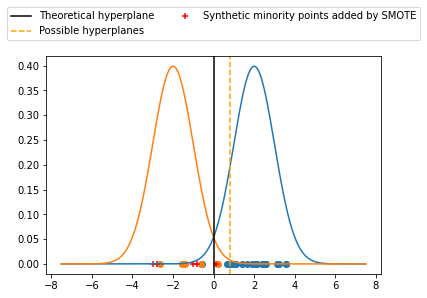

In [36]:
plt.scatter(xpos, np.zeros(len(xpos)))
plt.scatter(xneg, np.zeros(5))
plt.scatter([-3, -2.8, -1, -0.8,0.1 ], np.zeros(5), marker = "+", c = "red", label = "Synthetic minority points added by SMOTE")
#plt.scatter(xpos1rule, np.zeros(len(xpos1rule)), marker = "x", c = "black", label = "Eliminated step 1 in NCL")
#plt.scatter(xpos2rule, np.zeros(len(xpos2rule)), marker = "x", c = "red", label = "Eliminated step 2 in NCL")


plt.plot(x_axis, norm.pdf(x_axis,2,1))
plt.plot(x_axis, norm.pdf(x_axis,-2,1))
plt.axvline(x=0, label='Theoretical hyperplane', c = "black")
plt.axvline(x=0.8, label='Possible hyperplanes', c = "orange", linestyle = '--')



plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.show()